# Data Analysis

+ What is the relationship between people who survived and where the embarked onto the ship? Is there one city that has a higher percentage of survivors than others?

+ What is the relationship between people who survived and their passenger class on the ship? Did more first-class passengers survive over the second- and third-class passengers?

+ What is the relationship between the gender of the passengers and their survival rate? Did more females survive compared to males?

+ Is there a relationship between the gender and the passenger class on the ship? For example, did more females from first-class survive as opposed to, males from third-class?

+ How did age play a role in the survival rate of the passengers? Were passengers that were younger than 30 have a higher rate of survival than those that were 30 and older?

+ What was the age distribution in each passenger class? What was the age distribution of passengers as a function of the city that they boarded the ship?

+ What was the distribution of survivors as a function of the quartiles of their fare?

+ Was traveling alone the best predictor if you survived the titanic sinking? Specifically, did having a sibling or spouse reduce your changes of surviving the sinking? Was traveling without your parents or children an indicator of a higher rate of survival?

In [45]:
#Standard Imports 

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reference datasets 

train_url = 'http://bit.ly/titanic-001'
test_url = 'http://bit.ly/titanic-002'
survive_url = 'http://bit.ly/titanic-003'

In [3]:
#Load datasets into Pandas dataframes

df_train = pd.read_csv(train_url)
df_test = pd.read_csv(test_url)
df_survive = pd.read_csv(survive_url)

In [4]:
#Combine df_test and df_survive using an inner join on 'PassengerId'

test_combined_df = pd.merge(df_test, df_survive, on='PassengerId', how='inner')
test_combined_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [5]:
#Combine the newly formed dataframe and df_train

df = test_combined_df.append(df_train)

In [6]:
#Display head of df_combined.

df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,0,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,1,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,0,240276
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,0,315154
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,1,3101298


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [8]:
# Assume that the city of the black entires is the city where most of the people boarded. 
# Drop the cabin numbers.

In [9]:
# Assume that age of the NaN entires is equal to the mean of the data set.

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [10]:
# Assume that the fare of the NaN entires is equal to the mean of the data set.
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [11]:
df['Embarked'].fillna(df['Embarked'] == 'S', inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [13]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,0,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,1,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,0,240276
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,0,315154
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,1,3101298


In [14]:
df['SibSp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [15]:
df['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [16]:
def parents_replace(c):
    if c['Parch'] == 0:
        return 'Yes'
    else:
        return 'No'

In [17]:
def sibling_replace(c):
    if c['SibSp'] == 0:
        return 'Yes'
    else:
        return 'No'

In [18]:
df['Travel_w_ Parents'] = df.apply(parents_replace, axis=1)

In [19]:
df['Travel_w_ Siblings'] = df.apply(sibling_replace, axis=1)

In [21]:
df['Embarked'] = df['Embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

In [22]:
df['Fare'].describe()

count    1309.000000
mean       33.295479
std        51.738879
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [23]:
bins = [0, 7.89, 14.45, 31.27, 512.32]
group_names = ['Low', 'Below Average', 'Above Average', 'High']

In [24]:
categories = pd.cut(df['Fare'], bins, labels=group_names)
df['FareCategories'] = pd.cut(df['Fare'], bins, labels=group_names)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Travel_w_ Parents,Travel_w_ Siblings,FareCategories
0,34.5,NaN,Queenstown,7.8292,"Kelly, Mr. James",0,892,3,male,0,0,330911,Yes,Yes,Low
1,47.0,NaN,Southampton,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,1,363272,Yes,No,Low
2,62.0,NaN,Queenstown,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,0,240276,Yes,Yes,Below Average
3,27.0,NaN,Southampton,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,0,315154,Yes,Yes,Below Average
4,22.0,NaN,Southampton,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,1,3101298,No,No,Below Average


In [37]:
df_queenstown = df[df['Embarked'] == 'Queenstown']
df_queenstown_gb = df_queenstown[['Age', 'FareCategories']].groupby(['FareCategories'], as_index=False).mean() 
df_queenstown_gb

,FareCategories,Age
0,Low,29.079120
1,Below Average,37.952455
2,Above Average,25.469815
3,High,38.000000


In [35]:
df_southampton = df[df['Embarked'] == 'Southampton']
df_southampton_gb = df_southampton[['Age', 'FareCategories']].groupby(['FareCategories'], as_index=False).mean() 
df_southampton_gb

,FareCategories,Age
0,Low,27.878669
1,Below Average,28.418899
2,Above Average,30.035651
3,High,30.638795


In [40]:
df_cherbourg = df[df['Embarked'] == 'Cherbourg']
df_cherbourg_gb = df_cherbourg[['Age', 'FareCategories']].groupby(['FareCategories'], as_index=False).mean() 
df_cherbourg_gb

,FareCategories,Age
0,Low,27.571508
1,Below Average,25.079378
2,Above Average,28.551647
3,High,36.798862


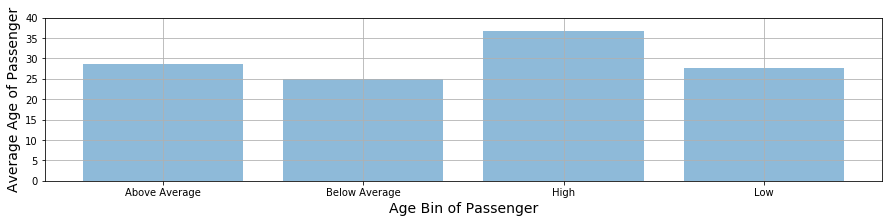

In [60]:
plt.figure(figsize=(15,3))
plt.bar(df_cherbourg_gb['FareCategories'], df_cherbourg_gb['Age'], alpha = 0.5)
plt.ylabel('Average Age of Passenger', fontsize = 14)
plt.xlabel('Age Bin of Passenger', fontsize = 14)
plt.ylim(0, 40, 5)
plt.grid(True)
plt.show()

In [ ]:
df['Age'].describe()

In [ ]:
bins = [0.17, 22.00, 29.88, 35.00, 80.00]
group_names = ['Low', 'Below Average', 'Above Average', 'High']

In [ ]:
df['AgeCategories'] = pd.cut(df['Age'], bins, labels=group_names)

### What is the relationship between people who survived and where the embarked onto the ship? Is there one city that has a higher percentage of survivors than others?

In [ ]:
df['Fare'].groupby(df['Pclass']).mean()

In [ ]:
df['Survived'].groupby(df['Embarked']).sum()

In [ ]:
df.pivot_table(index='Embarked', columns = 'Sex', aggfunc = sum)['Survived']





### What is the relationship between people who survived and their passenger class on the ship? Did more first-class passengers survive over the second- and third-class passengers?

In [ ]:
df['Survived'].groupby(df['Pclass']).count()

In [ ]:
df['Pclass'].groupby(df['Pclass']).count()

### What is the relationship between the gender of the passengers and their survival rate? Did more females survive compared to males?

In [ ]:
df['Sex'].groupby(df['Sex']).count()

In [ ]:
df['Survived'].groupby(df['Sex']).sum()

### Is there a relationship between the gender and the passenger class on the ship? For example, did more females from first-class survive as opposed to, males from third-class?

In [ ]:
groupby_regiment = df['Survived'].groupby(df['Pclass'])
groupby_regiment.sum()

In [ ]:
df.pivot_table(index='Pclass',columns='Sex',aggfunc=sum)['Survived']

### How did age play a role in the survival rate of the passengers? Were passengers that were younger than 30 have a higher rate of survival than those that were 30 and older?

In [ ]:
df['Survived'].groupby(df['AgeCategories']).sum()

In [ ]:
df['AgeCategories'].groupby(df['Embarked']).count()

In [ ]:
df.pivot_table(index='Embarked', columns='AgeCategories', aggfunc=sum)['Survived']

### What was the distribution of survivors as a function of the quartiles of their fare?


In [ ]:
df.pivot_table(index='FareCategories', columns='Sex', aggfunc='count')['Age']

+ Was traveling alone the best predictor if you survived the titanic sinking? 
+ Specifically, did having a sibling or spouse reduce your changes of surviving the sinking? 
+ Was traveling without your parents or children an indicator of a higher rate of survival?

In [ ]:
df.pivot_table(index='Travel_w_ Parents', columns='Sex', aggfunc=sum)['Survived']

In [ ]:
df.pivot_table(index='Travel_w_ Parents', columns='Sex', aggfunc='count')['Survived']

In [ ]:
df.pivot_table(index='Travel_w_ Siblings', columns='Sex', aggfunc=sum)['Survived']

In [ ]:
df.pivot_table(index='Travel_w_ Siblings', columns='Sex', aggfunc='mean')['Age']

In [ ]:
embark_perc = df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
embark_perc

In [ ]:
embark_perc = df[["Survived", "Sex"]].groupby(['Sex'],as_index=False).mean()
embark_perc